## SC3251 - Module 5  
**Name:** Hussary, Elias   
**Assignment:** SC3251 - Module 4 & 5   
**Date:** 2018-06-11

---

### Assignment Instructions
Option 2.

Section 6.5 of the OpenIntro Statistics textbook describes how simulation can assist when one of the assumptions / requirements of the Chi-square distribution are not met. The step-by-step explanation is presented in the chapter.

The assignment is to follow the steps using Python.
___

In [5]:
%config IPCompleter.greedy=True # for better intellisense
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt, rcParams
rcParams.update({'font.size': 16, 'figure.figsize': (10,6)}) # global formatting

### Hypothesis Simulation

People providing an organ for donation sometimes seek the help of a special “medical consultant”. These consultants assist the patient in all aspects of the surgery, with the goal of reducing the possibility of complications during the medical procedure and recovery. Patients might choose a consultant based in part on the historical complication rate of the consultant’s clients. **One consultant tried to attract patients by noting the average complication rate for liver donor surgeries in the US is about 10%, but her clients have only had 3 complications in the 62 liver donor surgeries she has facilitated.**
She claims this is strong evidence that her work meaningfully contributes to reducing complications (and therefore she should be hired!).  


#### 6.5.2 Generating the null distribution and p-value by simulation

In [3]:
# do the simulation
num_trials = 62
complication_rate = 0.1
iterations = 10000 
trial_data = []

while len(trial_data) < iterations:
    simulation = np.random.random_sample((num_trials,))
    failure_rate = sum(simulation < complication_rate) / num_trials
    trial_data.append(failure_rate)

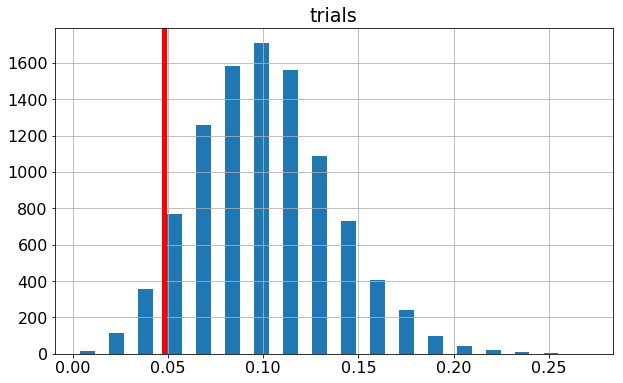

In [6]:
trial_df = pd.DataFrame({'trials': trial_data})
hist_ax = trial_df.hist(bins=18, rwidth=0.5)
plt.axvline(x=0.048, color='r', linewidth=5)

The columns left to the red line represent sample proportions under the null distribution that provide at least as much evidence as p favoring the alternative hypothesis.

In [7]:
# left_tail_count = sum(trial_df['trials'] <= 0.048) # -> ~444
# leaving the above line as a reminder to not use any rounded floats as it cut off a large part of the sample. wasted hours...
left_tail_count = sum(trial_df['trials'] <= (3.0/62))
left_tail_p_value = left_tail_count / iterations
print('Left Tail Count:', left_tail_count, 'P-value:', left_tail_p_value)

Left Tail Count: 1251 P-value: 0.1251


The estimated p-value of ~0.1251 is greater than the significance level of 0.05. Therefore there isn't enough evidence to support the consultant's claim.

#### 6.5.3 Generating the exact null distribution and p-value

In [19]:
stats.binom(62,.1).cdf(3)

0.1209787267464617

The exact p-value is very close to the simulated p-value. We do not reject the null hypothesis, and there is not statistically significant evidence to support the association.


If it were plotted, the exact null distribution would look almost identical to the
simulated null distribution shown above.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E6ECDD080>]],
      dtype=object)

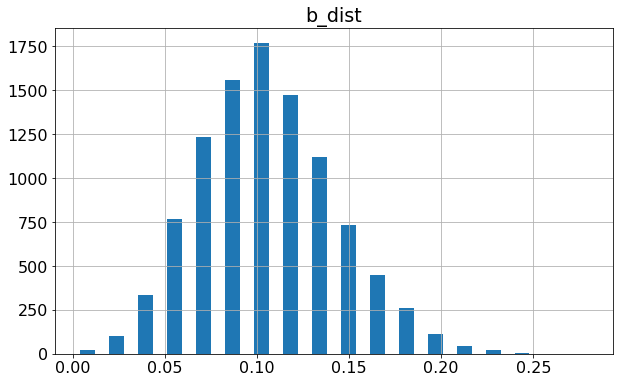

In [58]:
b_dist = np.random.binomial(62,0.1, size=10000) / 60
b_df = pd.DataFrame({'b_dist': b_dist})

b_df.hist(bins=18, rwidth=0.5)